In [1]:
def log(x):
    """
    밑이 e인 자연 로그
    입력값: 진수 x
    출력값: ln(x)
    """
    n = 100000000.0
    res = n*( ( x**(1/n) ) -1 )
    return res
    
def pseudo_sample(x0 = 16809,
                  mod = (2**31)-1,
                  seed = 1234567,
                  size = 1):
    """
    유사 난수 생성(0과 1사이)
    입력값
      x0: 초기 x0값
      mod: 난수 주기
      seed: 랜덤 시드
      size: 추출할 난수 개수
    출력값
      res: 0과 1사이 실수 난수 리스트
    """
    res = []
    x = (seed * x0 + 1)%mod
    u = x/mod
    res.append(u)
    for i in range(1, size):
        x = (seed * x + 1)%mod
        u = x/mod
        res.append(u)
    return res
    
def uniform_cont(low=0,
                 high=1,
                 seed=1234567,
                 size=1):
    """
    균일분포(연속형)에서 난수 추출
    입력값
      low: 하한
      hight: 상한
      seed: 랜덤 시드
      size: 추출 개수
    출력값
      res: 난수 리스트
    """
    s_list = pseudo_sample(seed=seed, size=size)
    res = []
    for s in s_list:
        val = low+(high-low)*s
        res.append(val)
    return res

In [2]:
u_list = uniform_cont(low=0, high=1, size=1000)
x_list = []
for u in u_list:
    x = -log(u)
    x_list.append(x)

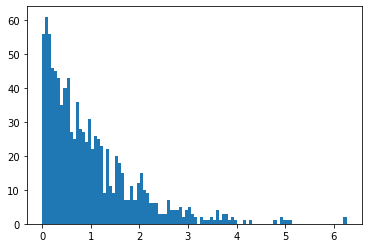

In [3]:
import matplotlib.pyplot as plt

plt.hist(x_list, bins=100)
plt.show()

# 베르누이 분포

In [4]:
def bernoulli(p=0.5, seed=1234567, size=1):
    """
    베르누이 분포에서 랜덤 숫자 추출
    """
    u_list = pseudo_sample(seed=seed, size=size)
    x_list = [0, 1]
    pdf = {}
    res = []
    
    for x in x_list:
        prob = (p**x)*((1-p)**(1-x))
        pdf[x] = prob
    
    for u in u_list:
        cumul_prob = 0
        for X in pdf.keys(): 
            cumul_prob += pdf[X]
            if cumul_prob > u:
                res.append(X)
                break
    return res

In [5]:
bernoulli(p=0.2, size=10)

[0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

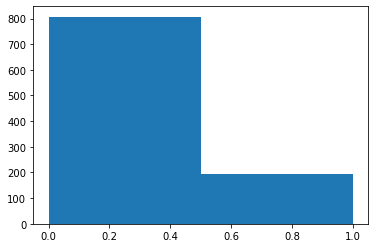

In [6]:
import matplotlib.pyplot as plt

samples = bernoulli(p=0.2, size=1000)

plt.hist(samples, bins=2)
plt.show()

# 이항 분포

In [7]:
def factorial(x):
    """
    팩토리얼 함수
    입력값: 정수 x
    출력값: x!
    """
    x_list = list(range(1, x+1))
    res = 1
    for val in x_list:
        res *= val
    return res

def combination(n, x):
    """
    조합
    입력값: n, x
    출력값: nCx(실수)
    """
    res = factorial(n)/(factorial(x)*factorial(n-x))
    return res    

In [8]:
def binomial(n, p=0.5, seed=1234567, size=1):
    """
    이항 분포에서 랜덤 숫자 추출
    """
    u_list = pseudo_sample(seed=seed, size=size)
    x_list = list(range(0, n))
    pdf = {}
    res = []
    
    for x in x_list:
        prob = combination(n,x)*(p**x)*((1-p)**(n-x))
        pdf[x] = prob
    
    for u in u_list:
        cumul_prob = 0
        for X in pdf.keys(): 
            cumul_prob += pdf[X]
            if cumul_prob > u:
                res.append(X)
                break
    return res

In [9]:
binomial(n=10, p=0.3, size=10)

[4, 3, 2, 4, 5, 2, 2, 1, 4, 2]

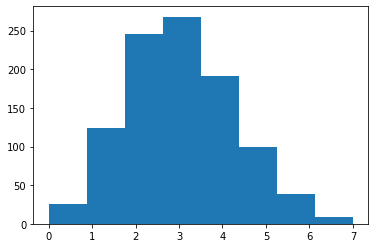

In [10]:
import matplotlib.pyplot as plt

samples = binomial(n=10, p=0.3, size=1000)

plt.hist(samples, bins=8)
plt.show()

# 포아송분포

In [11]:
def poisson(lamb, seed=1234567, size=1):
    """
    포아송 분포에서 랜덤 숫자 추출
    """
    e = 2.7182818284
    u_list = pseudo_sample(seed=seed, size=size)
    x_list = list(range(0, 100))
    pdf = {}
    res = []
    
    for x in x_list:
        prob = ((e**(-lamb))*(lamb**x))/factorial(x)
        pdf[x] = prob
    
    for u in u_list:
        cumul_prob = 0
        for X in pdf.keys(): 
            cumul_prob += pdf[X]
            if cumul_prob > u:
                res.append(X)
                break
    return res

In [12]:
poisson(lamb=2, size=10)

[2, 2, 1, 3, 3, 1, 1, 0, 3, 1]

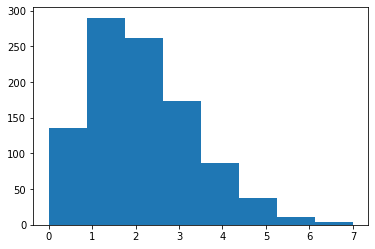

In [13]:
import matplotlib.pyplot as plt

samples = poisson(lamb=2, size=1000)

plt.hist(samples, bins=8)
plt.show()

# 기하 분포

In [14]:
def geometric(p=0.5, seed=1234567, size=1):
    """
    기하 분포에서 랜덤 숫자 추출
    """
    u_list = pseudo_sample(seed=seed, size=size)
    x_list = list(range(1, 100))
    pdf = {}
    res = []
    
    for x in x_list:
        prob = p*((1-p)**(x-1))
        pdf[x] = prob

    for u in u_list:
        cumul_prob = 0
        for X in pdf.keys(): 
            cumul_prob += pdf[X]
            if cumul_prob > u:
                res.append(X)
                break
    return res

In [15]:
geometric(p=0.2, size=10)

[5, 5, 1, 6, 9, 2, 2, 1, 8, 3]

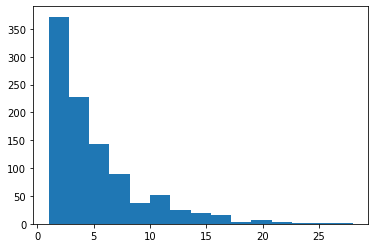

In [16]:
import matplotlib.pyplot as plt

samples = geometric(p=0.2, size=1000)

plt.hist(samples, bins=15)
plt.show()

# 음이항 분포

In [17]:
def neg_binomial(r, p=0.5, seed=1234567, size=1):
    """
    기하 분포에서 랜덤 숫자 추출
    """
    u_list = pseudo_sample(seed=seed, size=size)
    x_list = list(range(r, 100))
    pdf = {}
    res = []
    
    for x in x_list:
        prob = combination(x-1, r-1)*(p**r)*((1-p)**(x-r))
        pdf[x] = prob

    for u in u_list:
        cumul_prob = 0
        for X in pdf.keys(): 
            cumul_prob += pdf[X]
            if cumul_prob > u:
                res.append(X)
                break
    return res

In [18]:
neg_binomial(r=2, p=0.3, size=10)

[7, 7, 3, 8, 11, 4, 4, 2, 10, 5]

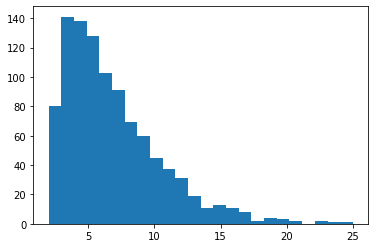

In [19]:
import matplotlib.pyplot as plt

samples = neg_binomial(r=2, p=0.3, size=1000)

plt.hist(samples, bins=24)
plt.show()